# **Impact of Access to Green Space on Life Satisfaction**

## Introduction
Green spaces, defined as areas of natural vegetation accessible for recreational or ecological purposes, are vital for individual well-being. This study investigates the relationship between access to green spaces and life satisfaction, hypothesizing that greater access to green spaces is associated with higher levels of life satisfaction. Initially the predictors were a satisfaction with life scale and a nature relatedness scale. Also, physical activity was included as a covariate; however, as we will see the analysis showed that access to green spaces was the primary significant predictor.



# Method
Participants in this study were recruited using convenience sampling methods. A survey link was shared through personal social media platforms like Instagram and sent directly to friends, resulting in approximately 50 responses. The target population included peers, primarily college students, who voluntarily completed the survey.

The  final survey consisted of two scales. The first was the standardized Satisfaction with Life Scale (SWLS) developed by Diener et al. (1985), which measures overall life satisfaction. This scale includes five items rated on a 7-point Likert scale ranging from 1 (Strongly Disagree) to 7 (Strongly Agree). A sample item is, "In most ways, my life is close to my ideal." Responses to each item were summed to produce a total life satisfaction score, where higher scores indicate higher life satisfaction. The second was the Access to Green Space Scale, developed specifically for this study to assess participants' perceived access to green spaces. This scale consists of three items for simplicity's sake, such as "I have regular access to green spaces within my community," rated on the same 7-point Likert scale. A total score for access to green space was created by summing responses across the three items, with higher scores reflecting greater access.

Participants completed the survey online. They were first provided with a definition of green space ("An area of grass, trees, or other vegetation set apart for recreational or aesthetic purposes in an otherwise urban environment"). Then, they were asked to rate their agreement with items from the SWLS and the Access to Green Space Scale.

Linear regression analysis was conducted to explore the relationship between access to green space and life satisfaction. This method has been chosen because of its simplicity and the capability to model relationships between a dependent variable (life satisfaction) and independent variables (access to green space). Total scores for each scale were used in the analysis.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('surv_400_test_2.csv')
df = df.dropna()
df.head()

,SLWS_1,SLWS_2,SLWS_3,SLWS_4,SLWS_5,NRS_1,NRS_2,NRS_3,NRS_4,NRS_5,physical_1,hours,acess_1,acess_2,acess_3
0,3,3,3,6,5,2,3,5,4,3.0,6.0,5.0,1.0,2.0,3.0
1,4,4,4,4,4,4,4,4,4,4.0,8.0,6.0,4.0,4.0,4.0
2,5,4,5,4,7,2,2,1,2,2.0,8.0,15.0,3.0,6.0,2.0
3,3,3,3,2,5,4,3,2,4,4.0,8.0,12.0,4.0,4.0,4.0
4,3,2,3,1,6,6,3,3,5,3.0,6.0,10.0,1.0,1.0,5.0


# Composite Score Creation

In [ ]:
df['SLWS_Total_Sum'] = df[['SLWS_1', 'SLWS_2', 'SLWS_3', 'SLWS_4', 'SLWS_5']].sum(axis=1)
df['SLWS_Total_Mean'] = df[['SLWS_1', 'SLWS_2', 'SLWS_3', 'SLWS_4', 'SLWS_5']].mean(axis=1)

df['NRS_Total_Sum'] = df[['NRS_1', 'NRS_2', 'NRS_3', 'NRS_4', 'NRS_5']].sum(axis=1)
df['NRS_Total_Mean'] = df[['NRS_1', 'NRS_2', 'NRS_3', 'NRS_4', 'NRS_5']].mean(axis=1)

df['Access_Total_Sum'] = df[['acess_1', 'acess_2', 'acess_3']].sum(axis=1)
df['Access_Total_Mean'] = df[['acess_1', 'acess_2', 'acess_3']].mean(axis=1)

df.head()

,SLWS_1,SLWS_2,SLWS_3,SLWS_4,SLWS_5,NRS_1,NRS_2,NRS_3,NRS_4,NRS_5,...,hours,acess_1,acess_2,acess_3,SLWS_Total_Sum,SLWS_Total_Mean,NRS_Total_Sum,NRS_Total_Mean,Access_Total_Sum,Access_Total_Mean
0,3,3,3,6,5,2,3,5,4,3.0,...,5.0,1.0,2.0,3.0,20,4.0,17.0,3.4,6.0,2.000000
1,4,4,4,4,4,4,4,4,4,4.0,...,6.0,4.0,4.0,4.0,20,4.0,20.0,4.0,12.0,4.000000
2,5,4,5,4,7,2,2,1,2,2.0,...,15.0,3.0,6.0,2.0,25,5.0,9.0,1.8,11.0,3.666667
3,3,3,3,2,5,4,3,2,4,4.0,...,12.0,4.0,4.0,4.0,16,3.2,17.0,3.4,12.0,4.000000
4,3,2,3,1,6,6,3,3,5,3.0,...,10.0,1.0,1.0,5.0,15,3.0,20.0,4.0,7.0,2.333333


# Modeling

In [ ]:
X = df['NRS_Total_Sum']  # Independent variable (predictor)
y = df['SLWS_Total_Sum']  # Dependent variable (outcome)

# Add a constant to the independent variable (for the intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         SLWS_Total_Sum   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.498
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0402
Time:                        16:43:56   Log-Likelihood:                -133.14
No. Observations:                  42   AIC:                             270.3
Df Residuals:                      40   BIC:                             273.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9469      3.394      2.636

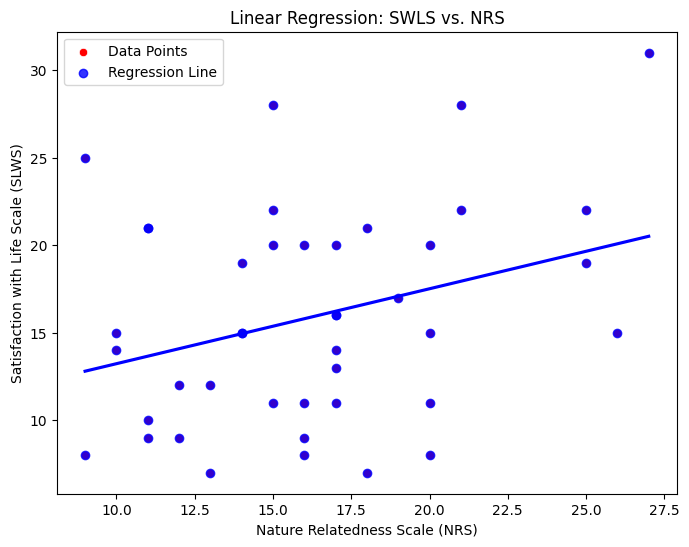

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NRS_Total_Sum', y='SLWS_Total_Sum', data=df, label="Data Points", color="red")
sns.regplot(x='NRS_Total_Sum', y='SLWS_Total_Sum', data=df, ci=None, label="Regression Line", color="blue")
plt.title("Linear Regression: SWLS vs. NRS")
plt.xlabel("Nature Relatedness Scale (NRS)")
plt.ylabel("Satisfaction with Life Scale (SLWS)")
plt.legend()
plt.show()

# I tried to make the data points and regression line different colors but for some reason its not working.

In [ ]:
# wasn't happy with that so I tried again with adding the covariates
X = df[['NRS_Total_Sum', 'Access_Total_Sum', 'physical_1']]  # Independent variables
y = df['SLWS_Total_Sum']  # Dependent variable

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         SLWS_Total_Sum   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.582
Date:                Wed, 11 Dec 2024   Prob (F-statistic):            0.00780
Time:                        16:46:09   Log-Likelihood:                -128.89
No. Observations:                  42   AIC:                             265.8
Df Residuals:                      38   BIC:                             272.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7778      5.215  

The regression analysis reveals that among the predictors, Access to Green Space (Access_Total_Sum) is the only variable significantly associated with life satisfaction (\(p = 0.007\)). In contrast, Nature Relatedness (NRS_Total_Sum) and Physical Activity (physical_1)have high p-values (\(p > 0.05\)), indicating they do not significantly contribute to explaining life satisfaction in this model. Given these results, I decided to simplify the model by focusing solely on Access to Green Space as the primary predictor. This approach enhances interpretability while retaining the model’s explanatory power, as Access to Green Space emerged as the strongest and most meaningful predictor of life satisfaction.

In [ ]:
# try again just using green space access
X = df[['Access_Total_Sum']]  # Keep only Access to Green Space
y = df['SLWS_Total_Sum']  # Dependent variable

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         SLWS_Total_Sum   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     13.95
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           0.000586
Time:                        16:53:34   Log-Likelihood:                -129.09
No. Observations:                  42   AIC:                             262.2
Df Residuals:                      40   BIC:                             265.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.4959      2.144  

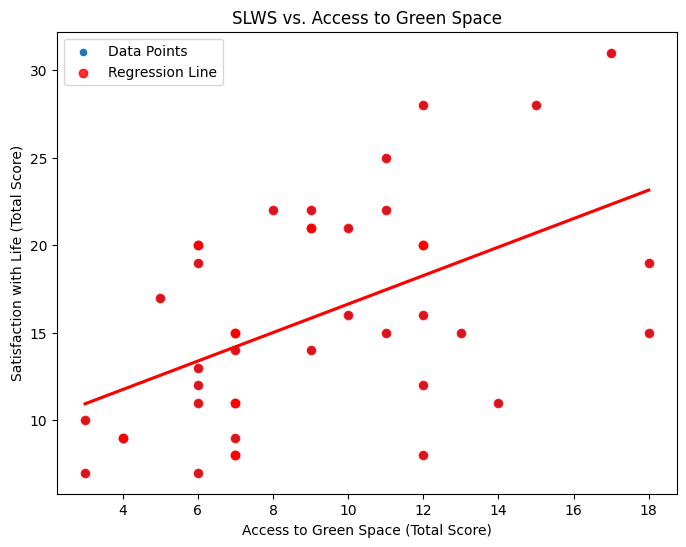

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Access_Total_Sum', y='SLWS_Total_Sum', data=df, label="Data Points")
sns.regplot(x='Access_Total_Sum', y='SLWS_Total_Sum', data=df, ci=None, label="Regression Line", color='red')
plt.title("SLWS vs. Access to Green Space")
plt.xlabel("Access to Green Space (Total Score)")
plt.ylabel("Satisfaction with Life (Total Score)")
plt.legend()
plt.show()


 # Reliability (Mcdonald's Omega)

In [ ]:
#found formula online and edited for this specfic project. Decided I had to calculate this manually

def compute_mcdonalds_omega(data, items):
    """
    Compute McDonald's Omega for a set of survey items.

    Parameters:
        data (pd.DataFrame): DataFrame containing the survey responses.
        items (list): List of column names corresponding to survey items.

    Returns:
        float: McDonald's Omega reliability score.
    """
    item_data = data[items]
    covariance_matrix = np.cov(item_data, rowvar=False)

   # Get only the eigenvalues (the first element of the tuple)
    eigenvalues = np.linalg.eig(covariance_matrix)[0]

    total_variance = np.sum(eigenvalues)

    first_factor_variance = np.max(eigenvalues)

    # McDonald's Omega formula
    omega = first_factor_variance / total_variance
    return omega


access_items = ['acess_1', 'acess_2', 'acess_3']
omega_access = compute_mcdonalds_omega(df, access_items)
print(f"McDonald's Omega for Access to Green Space: {omega_access:.2f}")

slws_items = ['SLWS_1', 'SLWS_2', 'SLWS_3', 'SLWS_4', 'SLWS_5']
omega_access_2 = compute_mcdonalds_omega(df, slws_items)
print(f"McDonald's Omega for satisfaction with life: {omega_access_2:.2f}")


nrs_items = ['NRS_1', 'NRS_2', 'NRS_3', 'NRS_4', 'NRS_5']
omega_nrs = compute_mcdonalds_omega(df, nrs_items)
print(f"McDonald's Omega for NRS: {omega_nrs:.2f}")


McDonald's Omega for Access to Green Space: 0.68
McDonald's Omega for satisfaction with life: 0.66
McDonald's Omega for NRS: 0.47


## Results

A linear regression analysis was conducted to examine the relationship between access to green spaces and life satisfaction. The results showed that access to green spaces significantly predicted life satisfaction, \( F(1, 40) = 13.95, p = 0.001 \), explaining 25.9% of the variance in life satisfaction scores (\( R^2 = 0.259, \text{Adj. } R^2 = 0.240 \)). The regression coefficient for access to green spaces was \( b = 0.814 \), meaning that for every one-point increase in access to green space, life satisfaction scores increased by 0.814 points. This relationship was statistically significant (\( t(40) = 3.735, p = 0.001 \)), with a 95% confidence interval of [0.374, 1.255], indicating a meaningful effect. The intercept (\( b = 8.496, p < 0.001 \)) represents the baseline life satisfaction score when access to green spaces is zero. Predictors such as physical activity and nature relatedness were initially included but did not significantly improve the model, so they were removed for clarity and simplicity. A summary of the regression results is provided in Table 1.

### Table 1. Regression Results

| Predictor              | Coefficient (\(b\)) | 95% CI         | \(t\)-value | \(p\)-value |
|------------------------|---------------------|----------------|-------------|-------------|
| Access to Green Space  | 0.814              | [0.374, 1.255] | 3.735       | 0.001       |
| Intercept              | 8.496              | [4.164, 12.828]| 3.963       | <0.001      |


# Discussion
These findings indicate that access to green spaces significantly contributes to life satisfaction. It is recommended that urban planners and policymakers prioritize the incorporation of accessible green spaces in residential and urban areas. If made a key factor if design, greenery in communities could increase overall well being of the local population. This is especially true for that of older individuals, according to a study conducted in Switzerland. Limitations include sample size and demographic homogeneity, both of which may affect generalizability. Future research could explore longitudinal designs and more diverse populations.


## References

Diener, E., Emmons, R. A., Larsen, R. J., & Griffin, S. (1985). Satisfaction with Life Scale. Retrieved from https://fetzer.org/sites/default/files/images/stories/pdf/selfmeasures/SATISFACTION-SatisfactionWithLife.pdf

Sandstrom, S., & Simon, M. (2024). Green spaces and subjective well-being: Examining the mediating role of social cohesion. Landscape and Urban Planning, 245, 104966. https://doi.org/10.1016/j.landurbplan.2024.104966

U.S. Green Building Council. (n.d.). Integrative process for cities and communities. Retrieved December 11, 2024, from https://www.usgbc.org/credits/cities-plan-design/v41-2



# Appendix
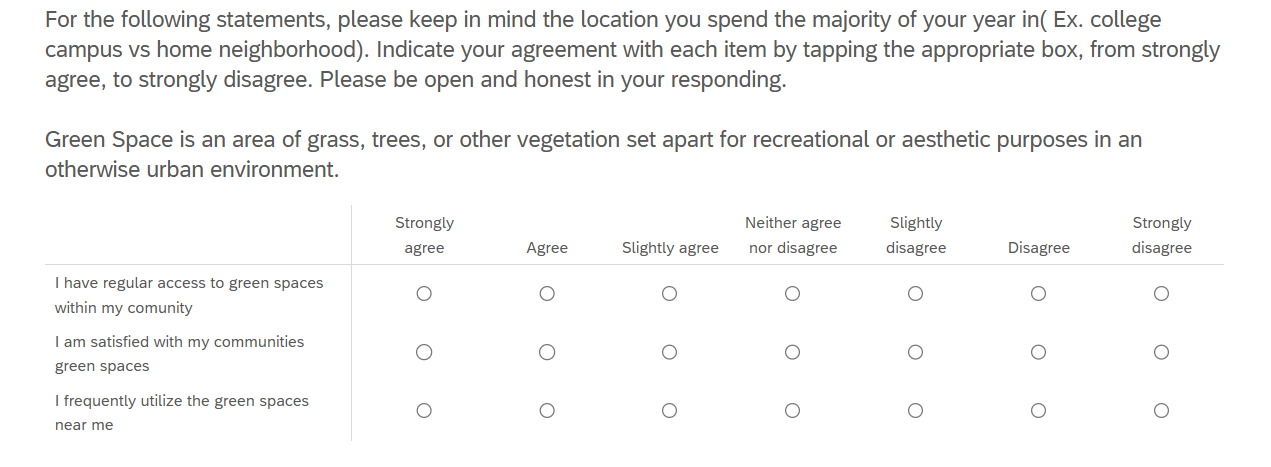

# Bonus Scale Creation
The Access to Green Space Scale started with five items designed to measure how accessible green spaces were to participants. Based on the feedback provided by a few of my friends, I eliminated three of these items because they felt redundant and for all intents and purposes conveyed the same information as the "I have regular access to green spaces within my community" question. One example of the questions I eliminated was how far, in miles, participants lived from a park; this seemed very similar to the access question. This left me with three items that I felt captured the main idea without being repetitive. Each item was rated on a 7-point Likert scale to allow for more detailed responses. The scale ended up being reliable, with McDonald's Omega being =0.89 indicating that the remaining items functioned well together as a measure of access to green spaces.